In [176]:
from skimage.io import imread, imsave
from skimage.exposure import histogram,equalize_adapthist,equalize_hist
from skimage.filters import threshold_otsu,threshold_yen
import matplotlib.pyplot as plt
import numpy as np

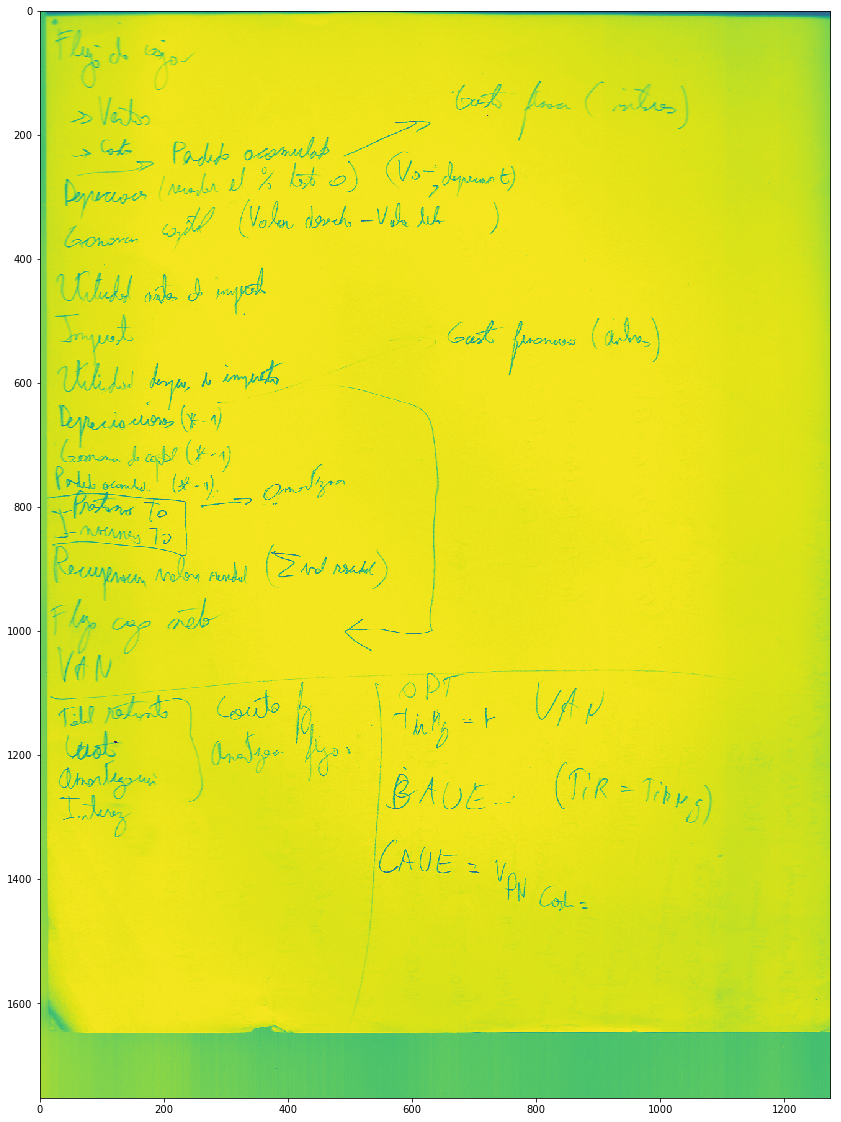

In [3]:
# Leer imagen de apuntes
ruta = "imagenes/evaluacionP/evalproj-04.png"

im = imread(ruta,as_grey=True)
plt.figure(figsize=(20,20))
plt.imshow(im)
plt.show()

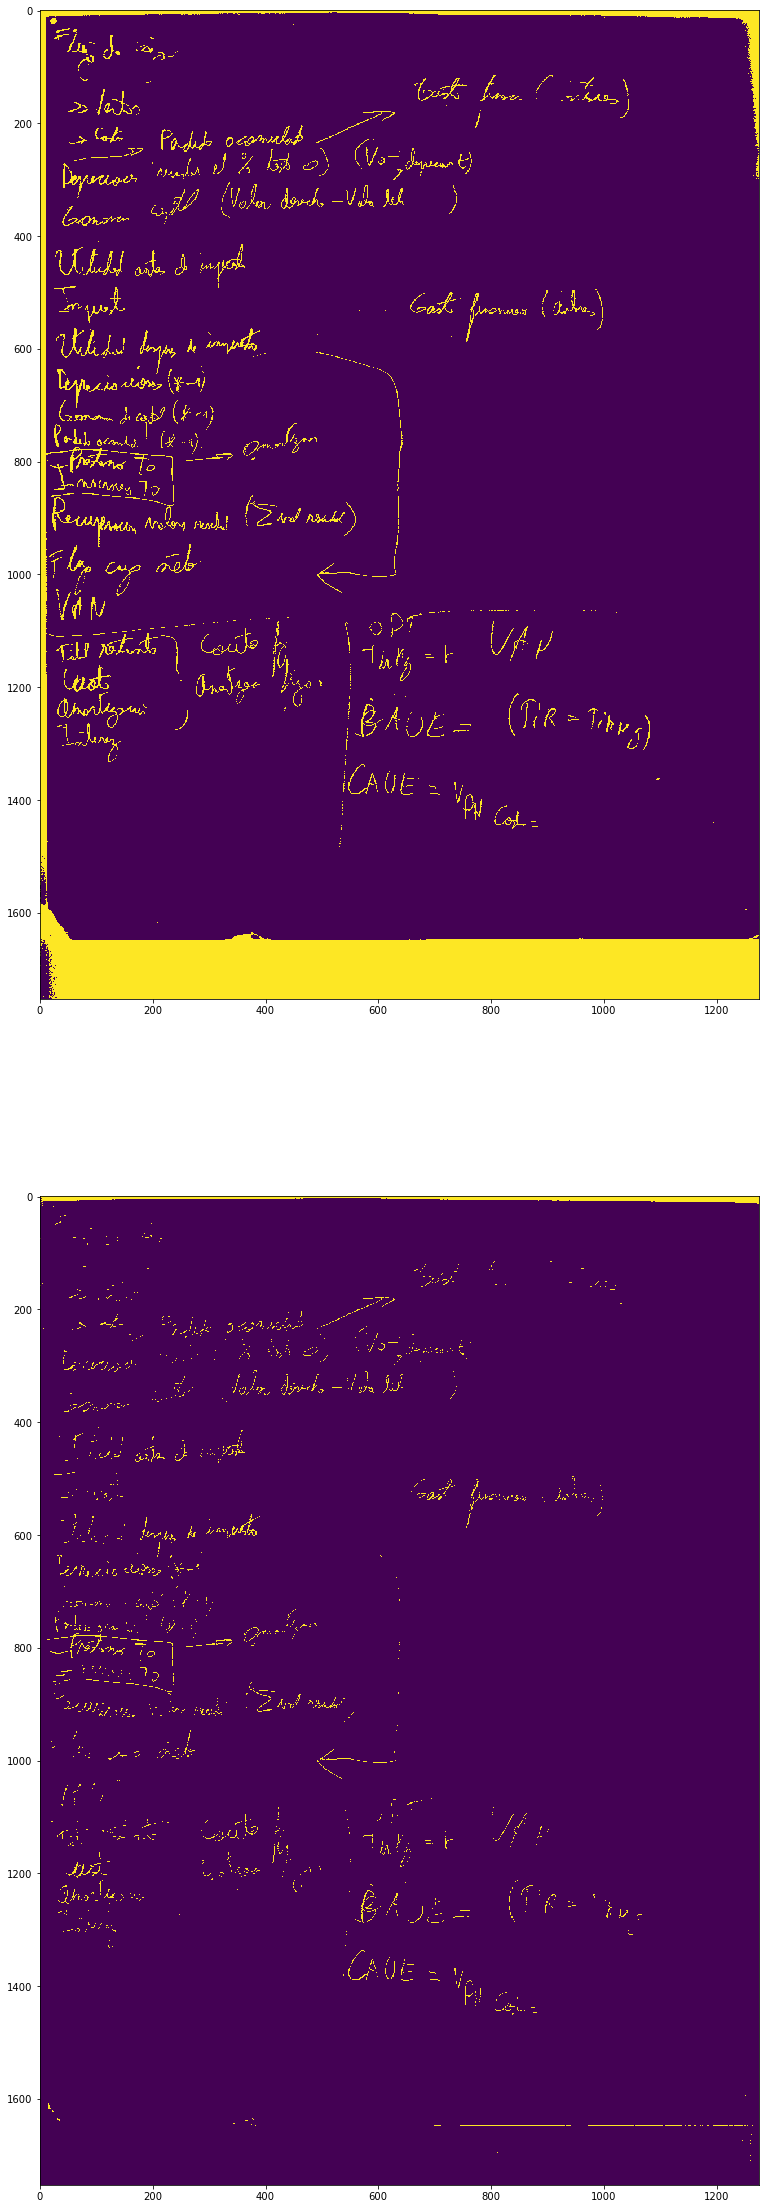

In [4]:
#Intento de recuperar rayas solo binarizando
bin1 = im < threshold_otsu(im)
bin2 = im < threshold_yen(im)


f,ax=plt.subplots(2,1,figsize=(20,40))
ax[0].imshow(bin1)
ax[1].imshow(bin2)
plt.show()

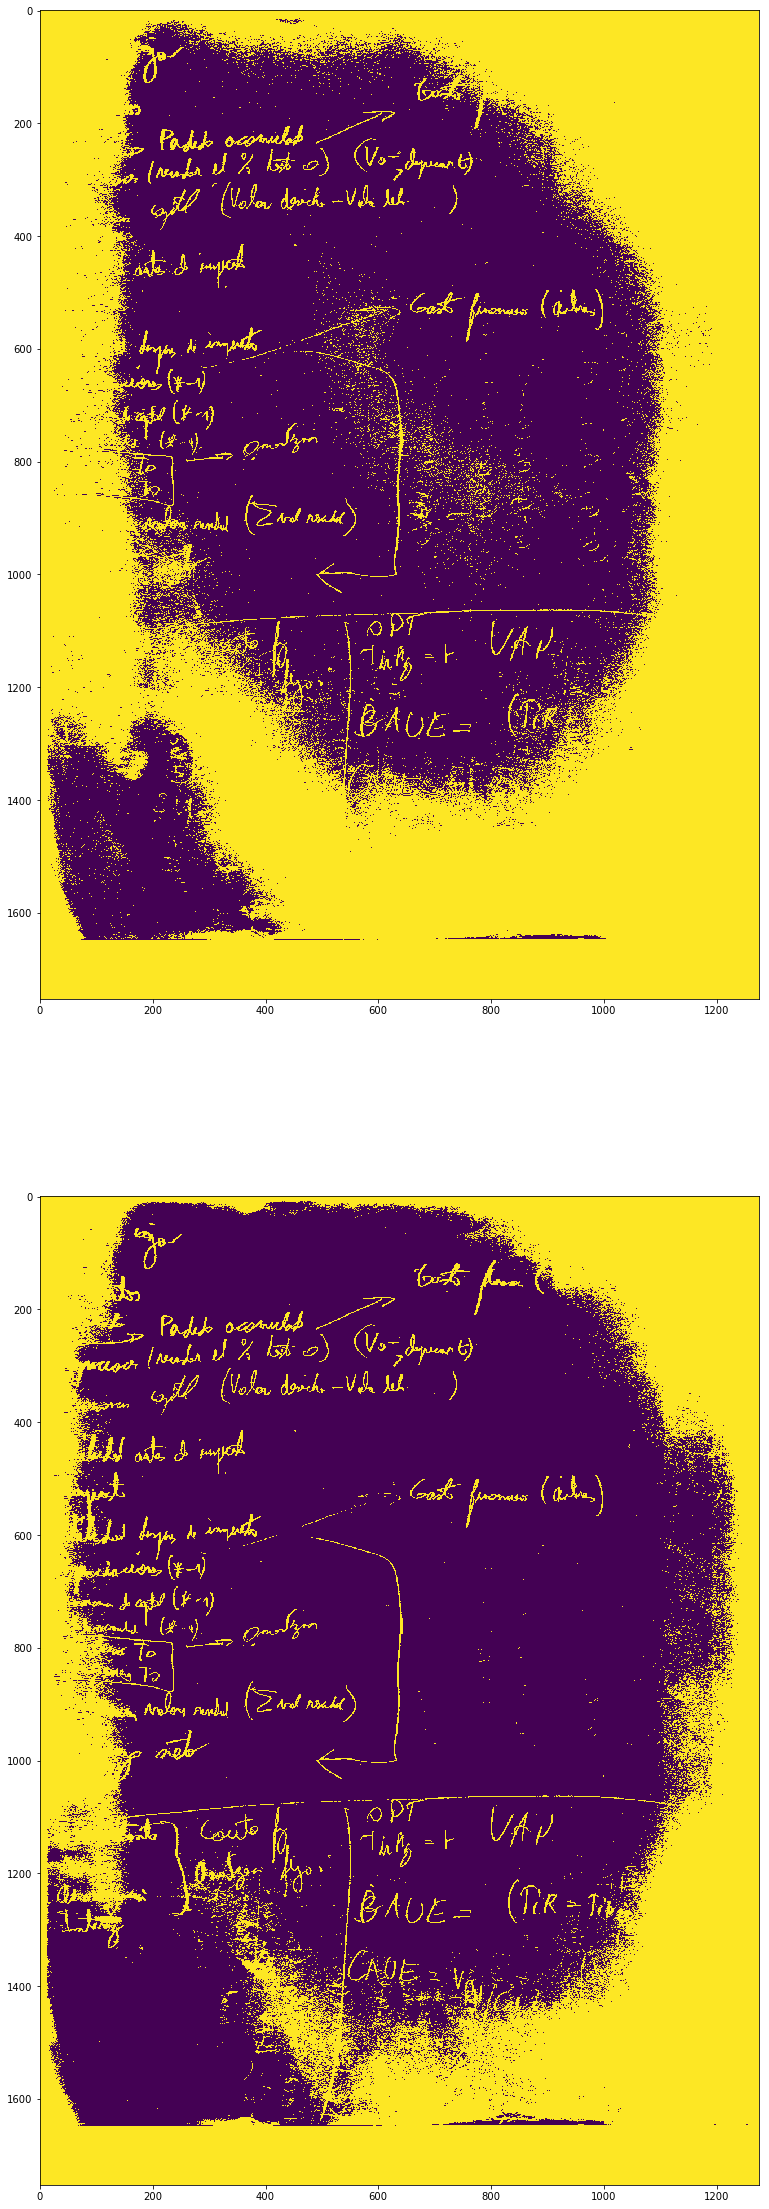

In [5]:
eq1=equalize_hist(im)

#Intento de recuperar rayas solo binarizando
bin1 = eq1 < threshold_otsu(eq1)
bin2 = eq1 < threshold_yen(eq1)


f,ax=plt.subplots(2,1,figsize=(20,40))
ax[0].imshow(bin1)
ax[1].imshow(bin2)
plt.show()

/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


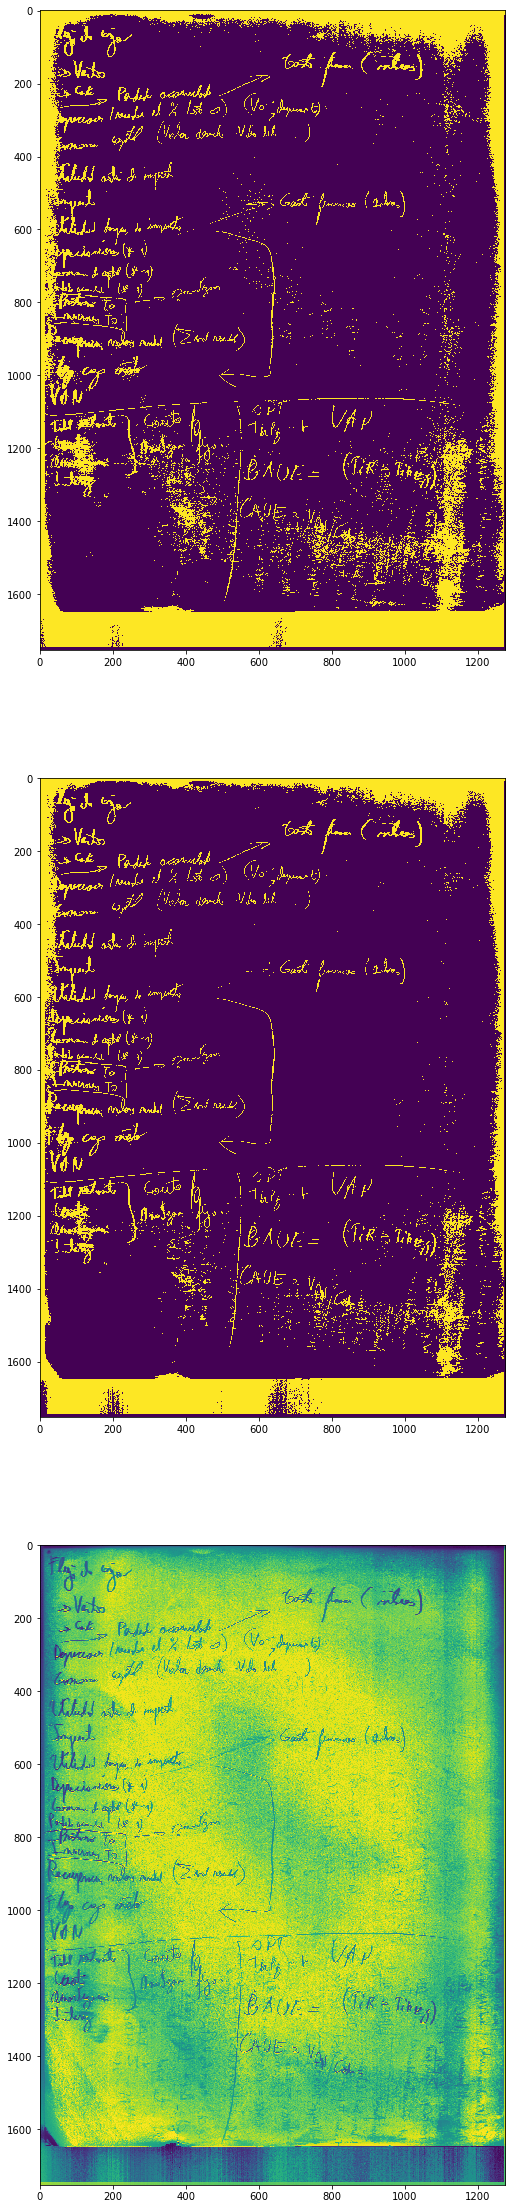

In [6]:
eq1=equalize_adapthist(im, clip_limit=0.06, nbins=256)

#Intento de recuperar rayas solo binarizando
bin1 = eq1 < threshold_otsu(eq1)
bin2 = eq1 < threshold_yen(eq1)


f,ax=plt.subplots(3,1,figsize=(20,40))
ax[0].imshow(bin1)
ax[1].imshow(bin2)
ax[2].imshow(eq1)

plt.show()

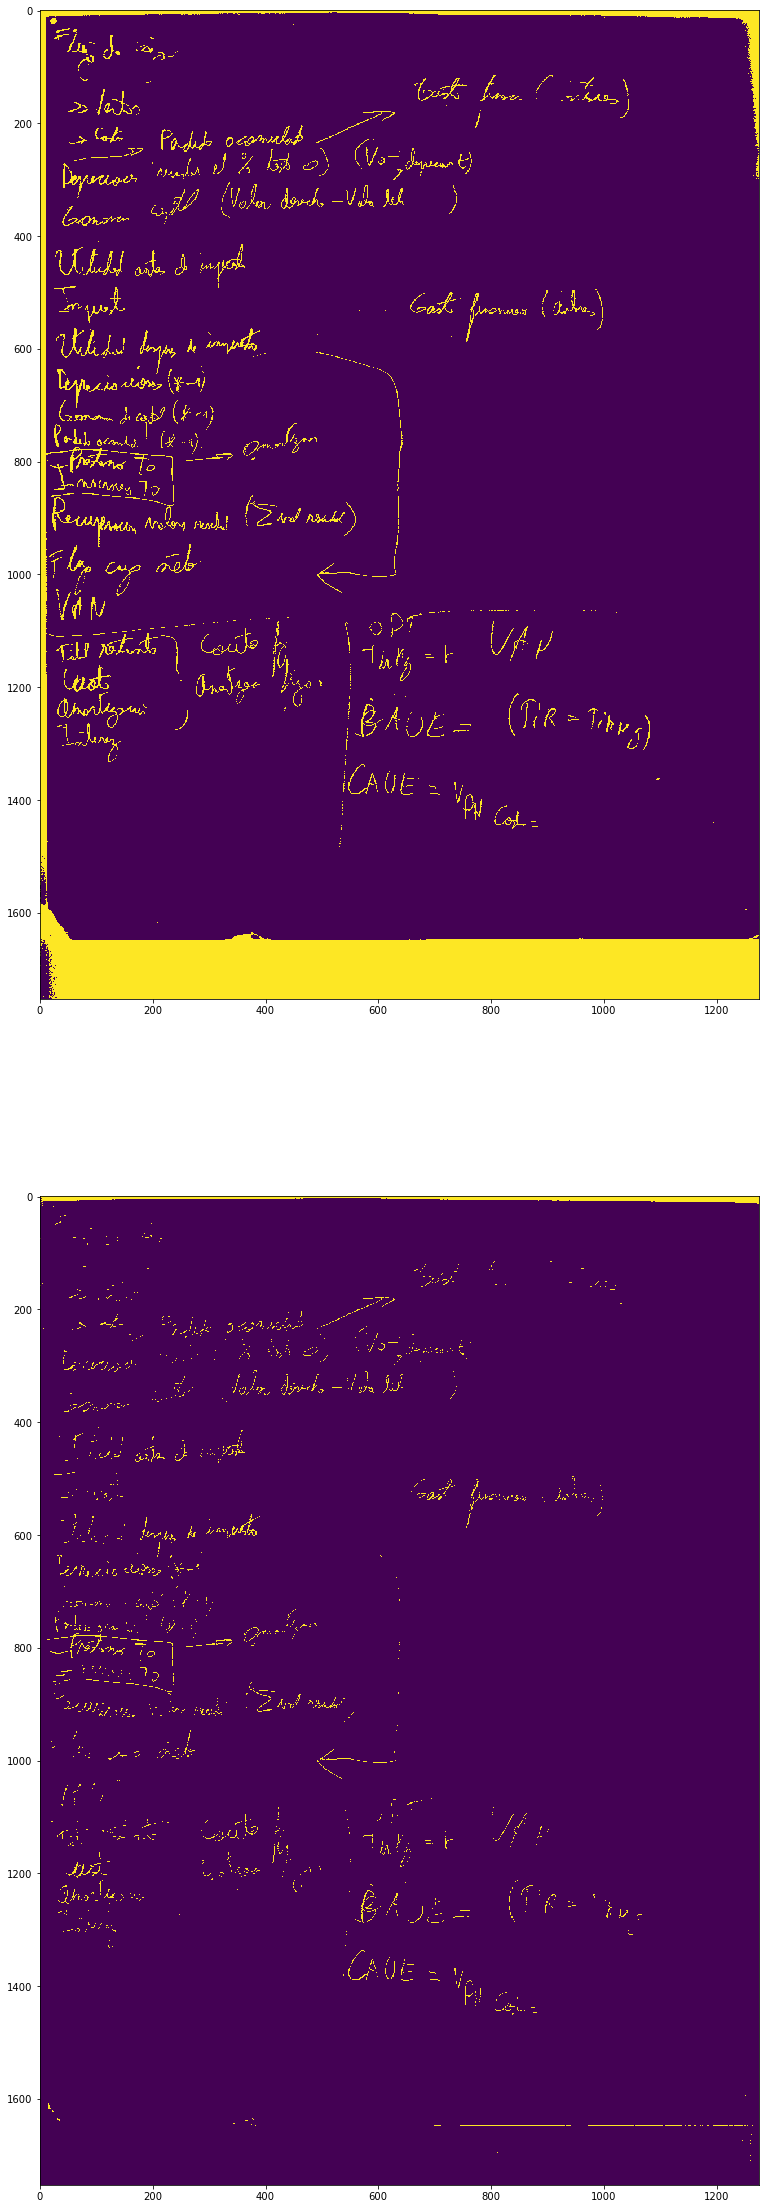

In [7]:
from skimage.exposure import rescale_intensity
eq1=rescale_intensity(im)

#Intento de recuperar rayas solo binarizando
bin1 = eq1 < threshold_otsu(eq1)
bin2 = eq1 < threshold_yen(eq1)


f,ax=plt.subplots(2,1,figsize=(20,40))
ax[0].imshow(bin1)
ax[1].imshow(bin2)
plt.show()

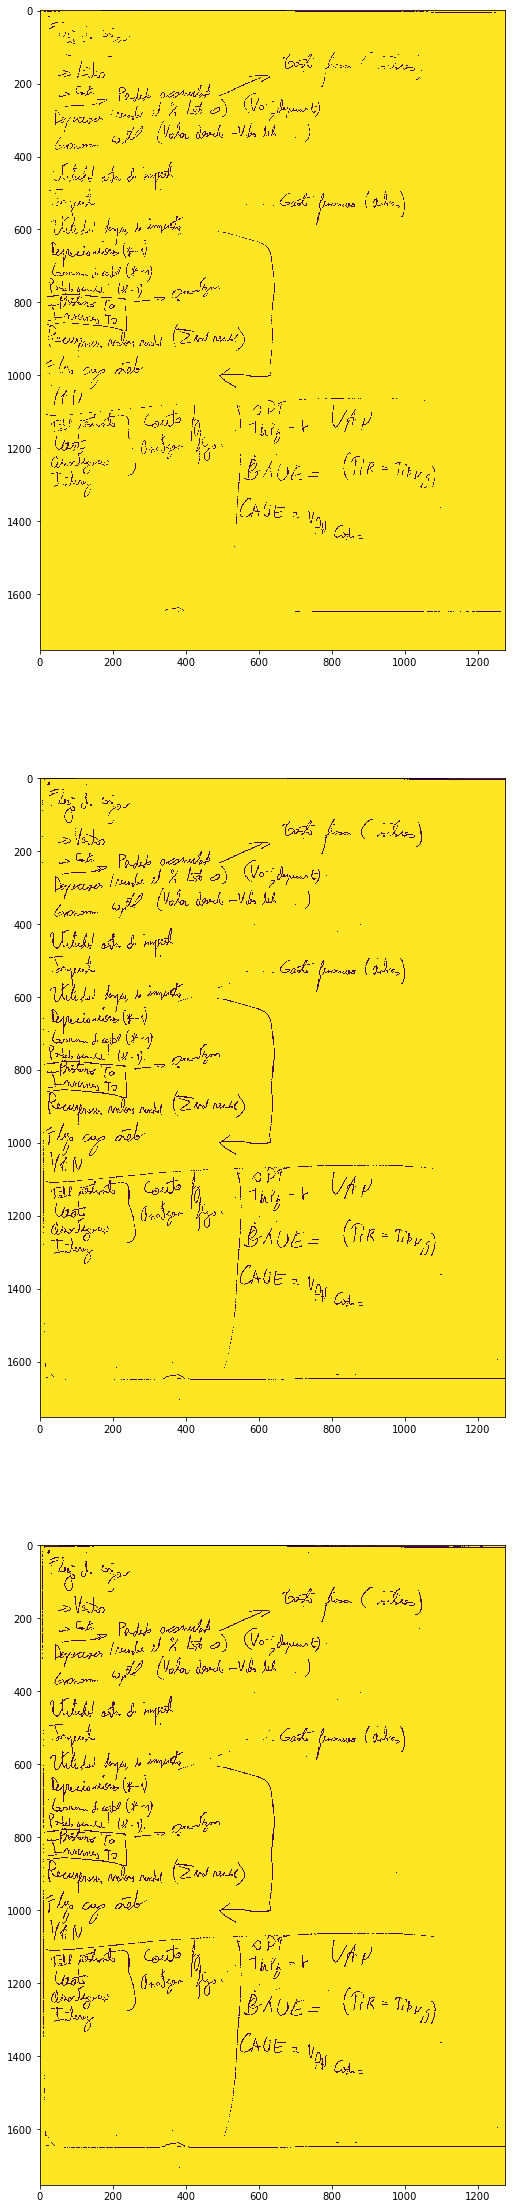

In [13]:
from skimage.filters import gaussian
p1 = gaussian(im,sigma=2)
p2 = gaussian(im,sigma=1)
res=p1-p2

minv = res.min()
delta = res.max()-res.min()
#Intento de recuperar rayas solo binarizando
r_norm = ((res + (0-minv)) / delta)
bin1 = r_norm < threshold_otsu(r_norm)
bin2 = r_norm < threshold_yen(r_norm)


f,ax=plt.subplots(3,1,figsize=(20,40))
ax[0].imshow(bin1)
ax[1].imshow(bin2)
ax[2].imshow(r_norm < 0.27)
plt.show()

In [14]:
r_norm

array([[ 0.24240809,  0.2459123 ,  0.25043933, ...,  0.25048565,
         0.24241138,  0.23593191],
       [ 0.24823791,  0.24799245,  0.24713953, ...,  0.25324566,
         0.24972047,  0.24594289],
       [ 0.24881694,  0.2473463 ,  0.24517108, ...,  0.25484149,
         0.25320069,  0.24961876],
       ..., 
       [ 0.24634896,  0.24556914,  0.24478658, ...,  0.24889056,
         0.24865191,  0.24806722],
       [ 0.24543722,  0.24437881,  0.2440565 , ...,  0.25068054,
         0.24915875,  0.24564151],
       [ 0.24563341,  0.24363391,  0.24358849, ...,  0.25308761,
         0.24902014,  0.24014396]])

/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


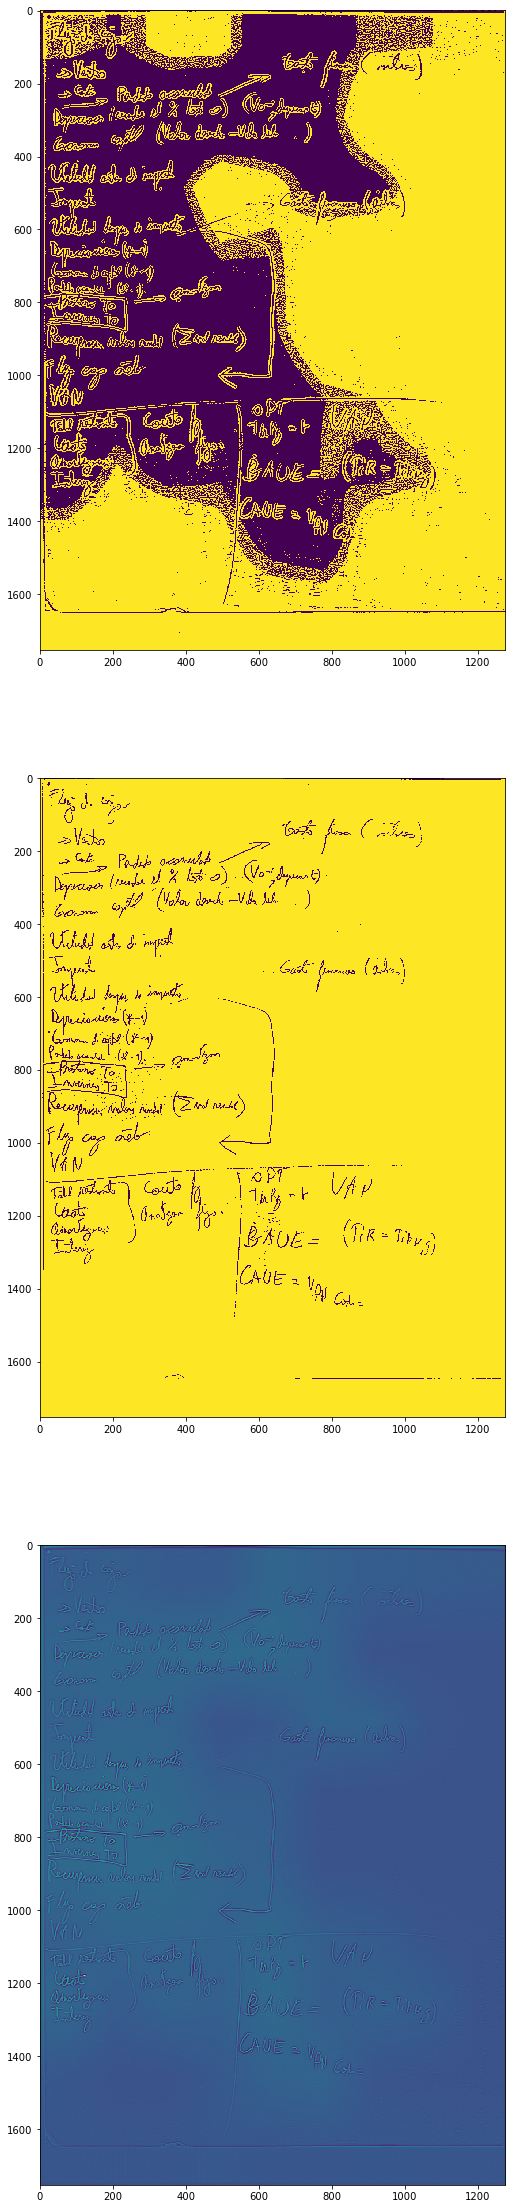

In [15]:
eq1=equalize_adapthist(r_norm)



bin1 = eq1 < threshold_otsu(eq1)
bin2 = eq1 < threshold_yen(eq1)


f,ax=plt.subplots(3,1,figsize=(20,40))
ax[0].imshow(bin1)
ax[1].imshow(bin2)
ax[2].imshow(eq1)
plt.show()

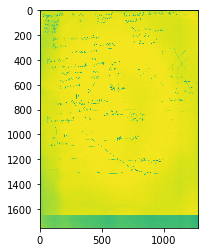

In [160]:
plt.imshow(im)
plt.show()

In [174]:
from pre_proceso import process

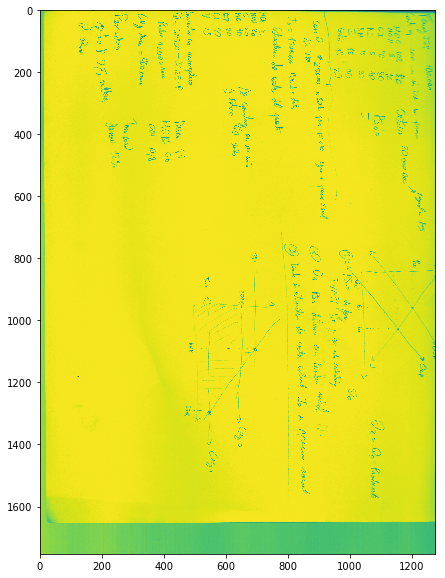

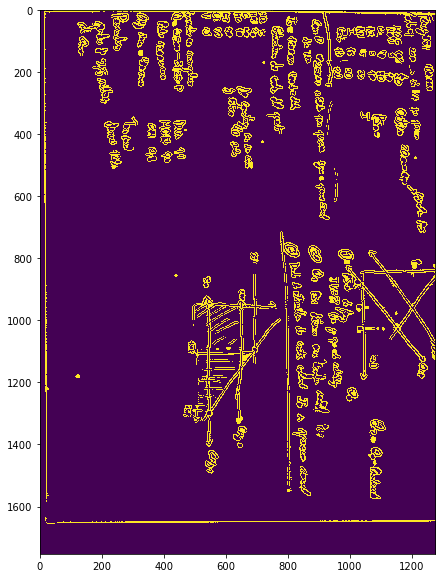

In [199]:
# Leer imagen de apuntes
ruta = "imagenes/evaluacionP/evalproj-01.png"

im = imread(ruta,as_grey=True)
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

bin1 = process(im)
plt.figure(figsize=(10,10))
plt.imshow(bin1); plt.show()

In [194]:
# Muestra resultados
import os
folderImages = 'imagenes/evaluacionP'
outF = 'imagenes/evaluacionP/procesadas'
images = os.listdir(folderImages)
for elem in images:
    base = os.path.split(elem)[-1].split('.')[0]
    if elem.split('.')[-1] == 'png':
        path = os.path.join(folderImages,elem)
        print('Abriendo {0}'.format(path))
        
        inputImg = imread(path,as_grey=True)
        out = process(inputImg)
        outP = os.path.join(outF,base+'_PROC.png')
        print('Guardando {0}'.format(outP))
        imsave(outP,out * 255)

Abriendo imagenes/evaluacionP/evalproj-04.png
Guardando imagenes/evaluacionP/procesadas/evalproj-04_PROC.png
Abriendo imagenes/evaluacionP/evalproj-01.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-04_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-01_PROC.png
Abriendo imagenes/evaluacionP/Documento escaneado-1.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-01_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/Documento escaneado-1_PROC.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/Documento escaneado-1_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Abriendo imagenes/evaluacionP/evalproj-08.png
Guardando imagenes/evaluacionP/procesadas/evalproj-08_PROC.png
Abriendo imagenes/evaluacionP/evalproj-09.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-08_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-09_PROC.png
Abriendo imagenes/evaluacionP/evalproj-11.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-09_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-11_PROC.png
Abriendo imagenes/evaluacionP/evalproj-05.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-11_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-05_PROC.png
Abriendo imagenes/evaluacionP/evalproj-07.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-05_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-07_PROC.png
Abriendo imagenes/evaluacionP/evalproj-06.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-07_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-06_PROC.png
Abriendo imagenes/evaluacionP/evalproj-03.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-06_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-03_PROC.png
Abriendo imagenes/evaluacionP/evalproj-12.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-03_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-12_PROC.png
Abriendo imagenes/evaluacionP/evalproj-10.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-12_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Guardando imagenes/evaluacionP/procesadas/evalproj-10_PROC.png


/home/aferral/miniconda3/envs/py35/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: imagenes/evaluacionP/procesadas/evalproj-10_PROC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


'evalproj-04'